In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/detailed-data/detailed_data.csv


In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score,classification_report
from sklearn.model_selection import train_test_split as tts

Using TensorFlow backend.


In [3]:
data = pd.read_csv('/kaggle/input/detailed-data/detailed_data.csv')

In [4]:
data.drop('Unnamed: 0',axis=1,inplace=True)

# Converting categorical data points into numeric so that we can pass that converted data to DNN for classification.

In [5]:
data['targets/0/title/0/value'] = LabelEncoder().fit_transform(data['targets/0/title/0/value'])

In [6]:
data['target_super_groups/0/title/0/value'] = LabelEncoder().fit_transform(data['target_super_groups/0/title/0/value'])

In [7]:
data.head()

,sid,marks,correct,wrong,partial,skipped,total_answered,targets/0/title/0/value,target_super_groups/0/title/0/value,class
0,d48694e44242cef14759e0d8e41f569f,1.0,1.0,2.0,0.0,7.0,3.0,5,8,0
1,d48694e44242cef14759e0d8e41f569f,3.0,3.0,7.0,0.0,0.0,10.0,5,8,1
2,d48694e44242cef14759e0d8e41f569f,1.0,1.0,9.0,0.0,0.0,10.0,5,8,0
3,d48694e44242cef14759e0d8e41f569f,6.0,6.0,4.0,0.0,0.0,10.0,5,8,1
4,d48694e44242cef14759e0d8e41f569f,1.0,1.0,9.0,0.0,0.0,10.0,5,8,0


# Visualizing the converted data distribution after converting categorical to numeric

24    741444
11    585864
7     348432
26    246228
20    131100
18     62959
25     23058
19     15651
27     14688
4      14213
1       7803
21      5208
13      5064
5       4608
2       1445
22      1336
23      1092
10      1026
14       666
3        551
6        314
28       204
16       148
9         85
0         40
8         20
12         8
15         8
17         8
Name: targets/0/title/0/value, dtype: int64


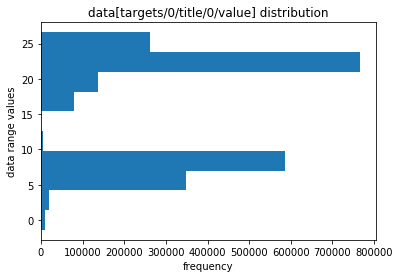

In [8]:
print( data['targets/0/title/0/value'].value_counts())
plt.title('data[targets/0/title/0/value] distribution')
plt.xlabel('frequency')
plt.ylabel('data range values')
plt.hist(data['targets/0/title/0/value'],bins=10,histtype='stepfilled',align='left',orientation='horizontal')
plt.show()

6    836551
3    514737
5    367227
7    251567
8    136835
0     76733
4     17550
2     10121
1      1950
Name: target_super_groups/0/title/0/value, dtype: int64


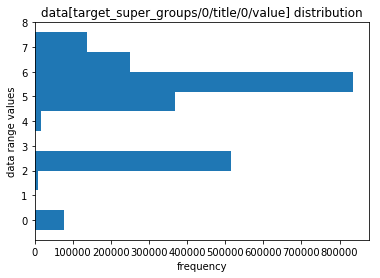

In [9]:
print( data['target_super_groups/0/title/0/value'].value_counts())
plt.title('data[target_super_groups/0/title/0/value] distribution')
plt.xlabel('frequency')
plt.ylabel('data range values')
plt.hist(data['target_super_groups/0/title/0/value'],bins=10,histtype='stepfilled',align='left',orientation='horizontal')
plt.show()

# Above mentioned visualization is used just for showcase purpose for making it more clear about distribution of data. 

In [10]:
X = data.iloc[:,1:]

In [11]:
Y = X['class']
X= X.iloc[:,0:8]

0    1648876
1     564395
Name: class, dtype: int64


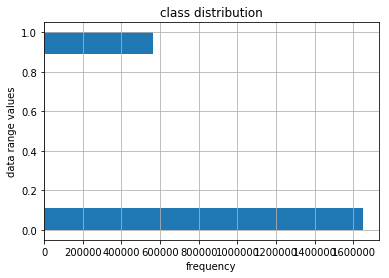

In [12]:
print(Y.value_counts())
plt.title('class distribution')
plt.xlabel('frequency')
plt.ylabel('data range values')
plt.grid()
plt.hist(Y,bins=9,histtype='stepfilled',align='mid',orientation='horizontal')
plt.show()


# Above 
# 0: student performance is low and need change a change in target course or improvement
# 1: student performance is good and elegible for target course


In [13]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('val_loss')<0.3144):
                self.model.stop_training = True

In [14]:
Y = keras.utils.to_categorical(Y,num_classes=2)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(units=64,activation='relu',input_shape=(X.shape[1],),kernel_initializer='random_normal'),
    keras.layers.Dense(units=8 ,activation='relu',kernel_regularizer='l2'),
    keras.layers.Dense(units=32 ,activation='relu',kernel_regularizer='l2'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=16 ,activation='relu',kernel_regularizer='l2'),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(units=8 ,activation='relu',kernel_regularizer='l2'),
    keras.layers.Dense(units=2 ,activation='softmax')
])

In [16]:
plot_model = keras.utils.plot_model(model,show_shapes=True)

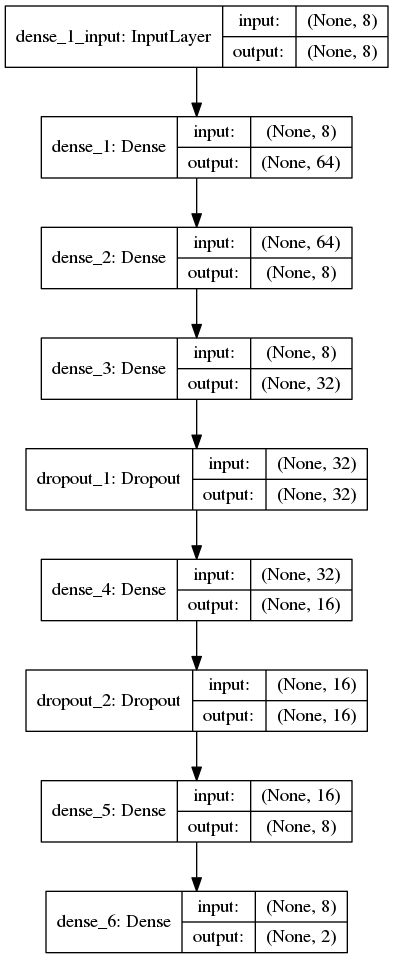

In [17]:
plot_model

In [18]:
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size=0.3,random_state=0)

In [19]:
xtrain.shape , xtest.shape

((1549289, 8), (663982, 8))

In [20]:
optimizer = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)

In [21]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(xtrain,ytrain,batch_size=1024,validation_split=0.2,epochs=10,verbose=2)

Train on 1239431 samples, validate on 309858 samples
Epoch 1/10
 - 8s - loss: 0.0795 - accuracy: 0.9924 - val_loss: 0.0641 - val_accuracy: 0.9950
Epoch 2/10
 - 8s - loss: 0.0743 - accuracy: 0.9929 - val_loss: 0.0580 - val_accuracy: 0.9963
Epoch 3/10
 - 8s - loss: 0.0689 - accuracy: 0.9937 - val_loss: 0.0583 - val_accuracy: 0.9958
Epoch 4/10
 - 8s - loss: 0.0650 - accuracy: 0.9939 - val_loss: 0.0512 - val_accuracy: 0.9971
Epoch 5/10
 - 8s - loss: 0.0622 - accuracy: 0.9941 - val_loss: 0.0499 - val_accuracy: 0.9972
Epoch 6/10
 - 8s - loss: 0.0597 - accuracy: 0.9941 - val_loss: 0.0517 - val_accuracy: 0.9948
Epoch 7/10
 - 8s - loss: 0.0571 - accuracy: 0.9944 - val_loss: 0.0439 - val_accuracy: 0.9973
Epoch 8/10
 - 8s - loss: 0.0548 - accuracy: 0.9946 - val_loss: 0.0460 - val_accuracy: 0.9970
Epoch 9/10
 - 8s - loss: 0.0526 - accuracy: 0.9948 - val_loss: 0.0409 - val_accuracy: 0.9974
Epoch 10/10
 - 8s - loss: 0.0508 - accuracy: 0.9951 - val_loss: 0.0384 - val_accuracy: 0.9978


# Evaluating model on unseen data

In [32]:
model_loss,model_accuracy = model.evaluate(xtest,ytest)

663982/663982 [==============================] - 46s 69us/step


# Accuracy Achieved and model loss 

In [33]:
model_loss,model_accuracy

(0.03844634246520115, 0.9977514743804932)

In [35]:
predicted_classes = model.predict_classes(xtest)

# Below graphs are performance graphs which will help to judge model

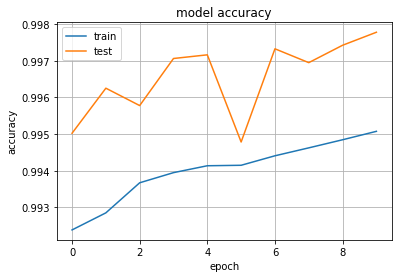

In [45]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

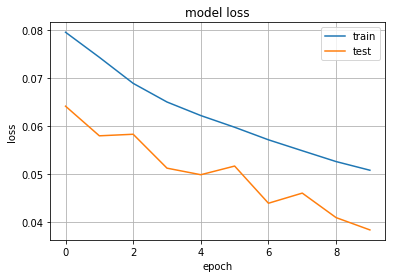

In [47]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model still require some updation as we have prepared dataset on the basis of asumptions mentioned in report. 

In [49]:
model.save('student_course_elegible_level_classifier.h5')